# Import Libraries

In [235]:
from __future__ import print_function
import os
import pickle
import shutil
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Init Program

In [236]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read The Dataset

In [237]:
DATA_PATH = '/content/drive/Shareddrives/Teman Tani/Capstone 2023/Machine Learning/Datasets/Crop Recommendation/Data-Crop-Recommendation.zip'
df = pd.read_csv(DATA_PATH)

# Exploratory Data Analysis

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [239]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [240]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [241]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [242]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [243]:
df.shape

(2200, 8)

In [244]:
df.size

17600

In [245]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [246]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [247]:
df['label'].nunique()

22

In [248]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [249]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

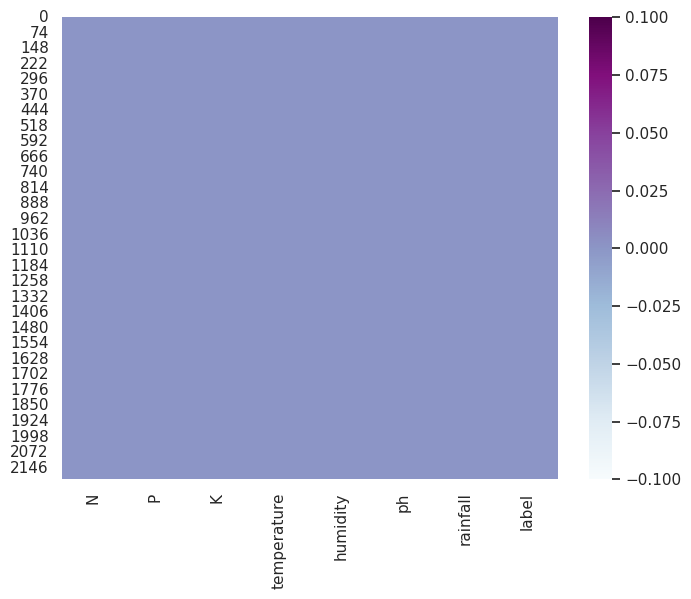

In [250]:
sns.heatmap(df.isnull(), cmap="BuPu")
plt.show()

<Axes: >

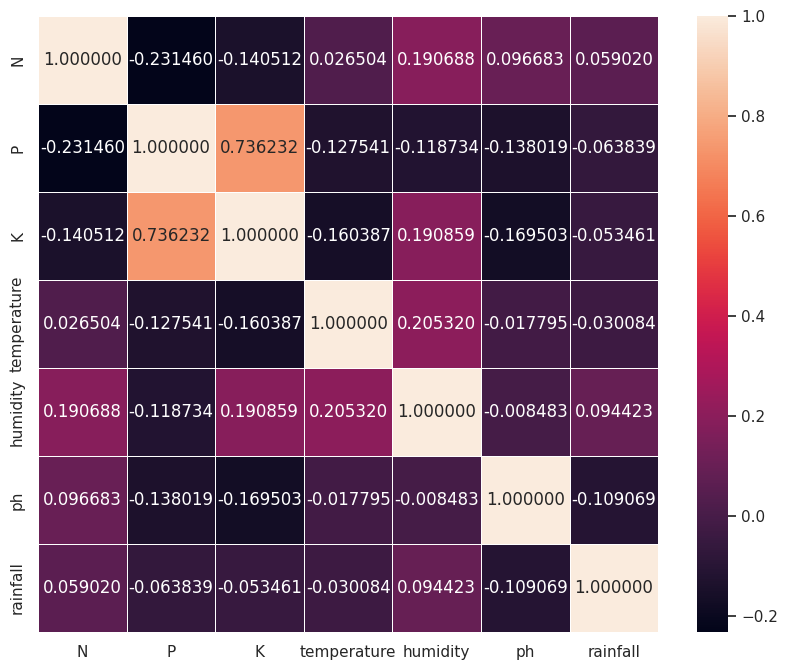

In [251]:
correlation_mat = df.corr()
correlation_mat
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, linewidths=.5,annot=True, fmt="f")

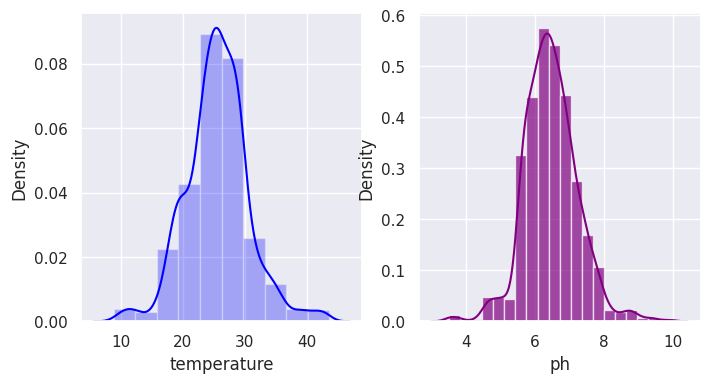

In [252]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.distplot(df['temperature'], color="blue", bins=10, hist_kws={'alpha': 0.3})

plt.subplot(1, 2, 2)
sns.distplot(df['ph'], color="purple", bins=20, hist_kws={'alpha': 0.7})

plt.show()

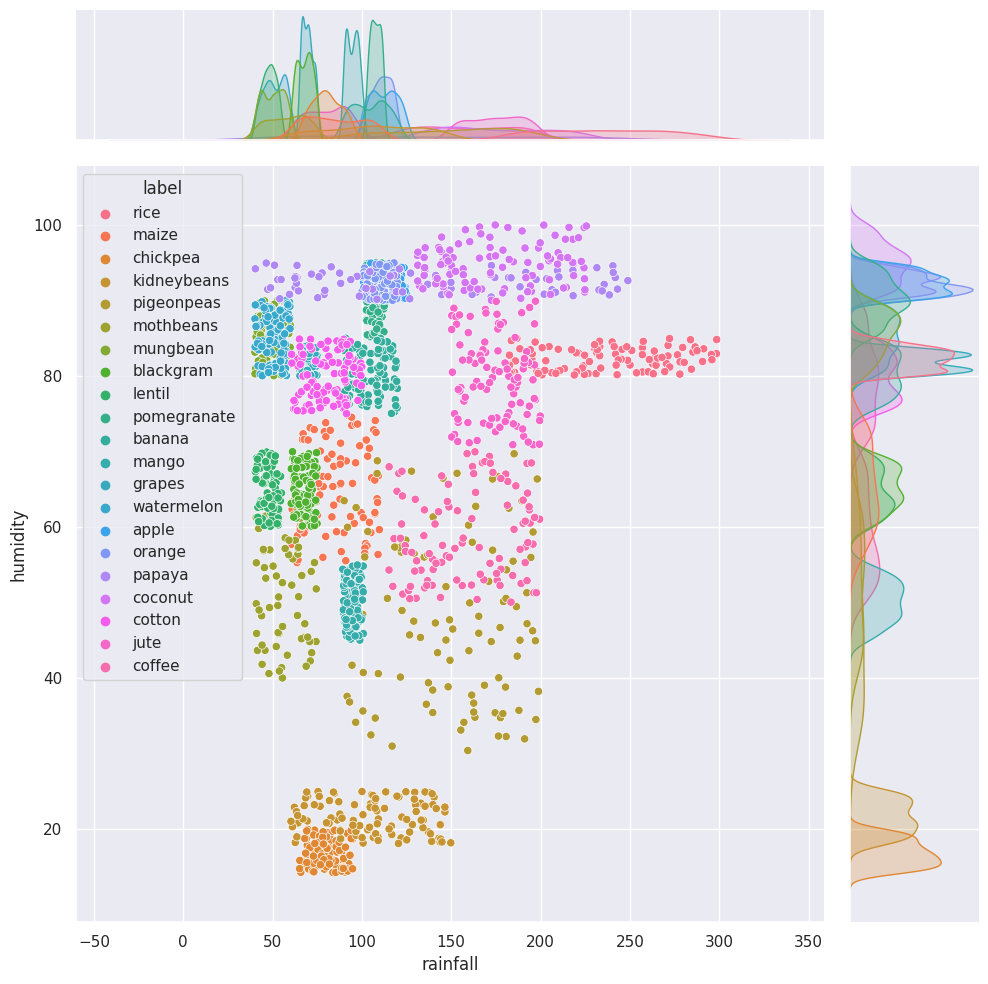

In [253]:
sns.set(rc={'figure.figsize':(8, 6)})
filtered_data = df[(df['temperature'] < 40) & (df['rainfall'] > 40)]
sns.jointplot(x='rainfall', y='humidity', data=filtered_data, height=10, hue='label')

In [254]:
data_summary = pd.pivot_table(df, index=['label'], aggfunc='mean')
data_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


# Selection The Feature

In [255]:
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

# Creating empty lists to store the names of all models and their corresponding values
model_name = []
model_acc = []


# Split the data which 20% of the data will be used for testing, and the remaining 80% will be used for training
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (1760, 7)
x_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


# Decision Tree

In [256]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=2, max_depth=8)
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

accuracy=accuracy_score(y_pred, y_test)
model_acc.append(accuracy)
model_name.append('Decision Tree')
print('Decision Tree Model accuracy : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Decision Tree Model accuracy : 0.9818


In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.93      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [258]:
# Cross validation
score = cross_val_score(decision_tree, features, target,cv=8)
print('Cross validation = ',score)

Cross validation =  [0.98909091 0.98181818 0.98545455 0.99272727 0.98909091 0.98181818
 0.99272727 0.97090909]


In [259]:
# Train Accuracy
dt_train_accuracy = decision_tree.score(x_train,y_train)
print("Training accuracy = ",decision_tree.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = decision_tree.score(x_test,y_test)
print("Testing accuracy = ",decision_tree.score(x_test,y_test))

Training accuracy =  0.9982954545454545
Testing accuracy =  0.9818181818181818


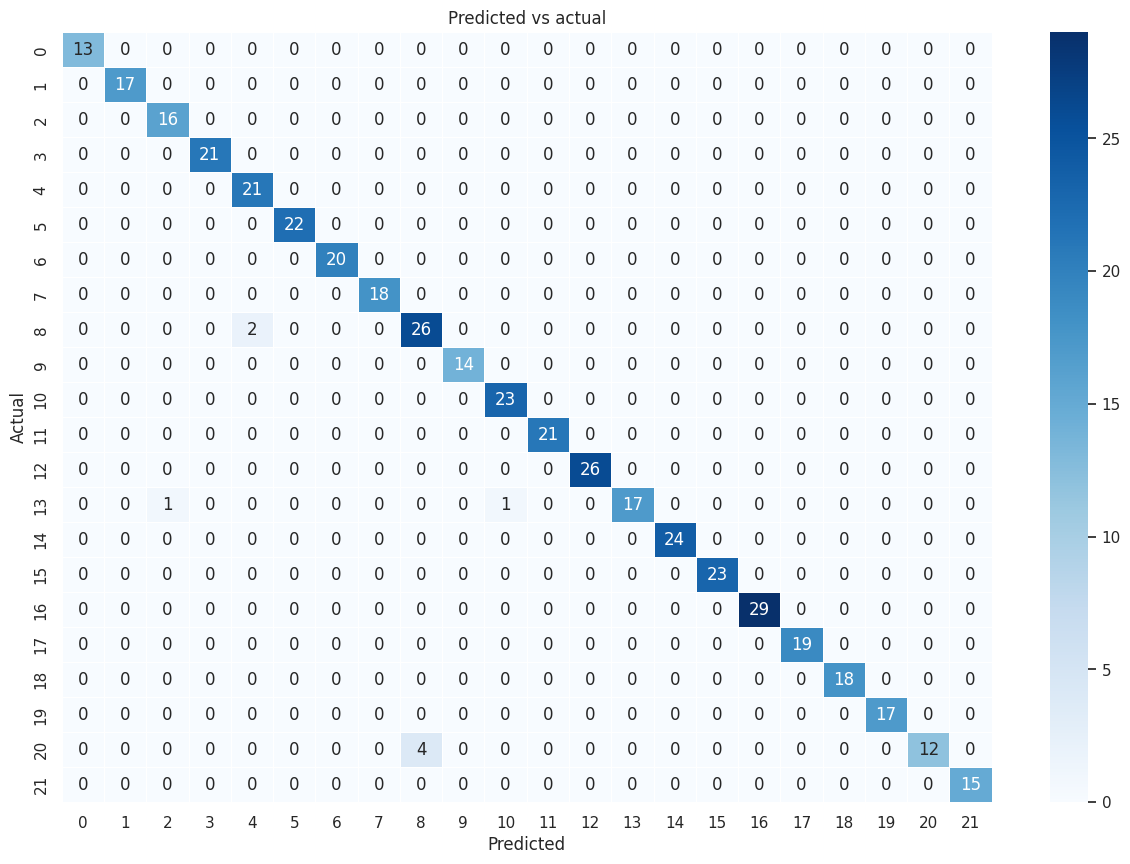

In [260]:
y_pred = decision_tree.predict(x_test)
y_true = y_test

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt='g',  cmap='Blues', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [262]:
# Save model
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(decision_tree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Random Forest

In [263]:
random_forest = RandomForestClassifier(n_estimators=18, criterion="entropy")  
random_forest.fit(x_train, y_train)  

y_pred= random_forest.predict(x_test) 

accuracy = accuracy_score(y_pred, y_test)
model_acc.append(accuracy)
model_name.append('Random Forest')
print('Random Forest Model accuracy : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Model accuracy : 0.9977


In [264]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.97      1.00      0.98        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [265]:
# Cross validation
score = cross_val_score(random_forest,features,target,cv=8)
print('Cross validation = ',score)

Cross validation =  [0.99636364 0.99636364 1.         0.98909091 0.99636364 0.98909091
 0.98909091 0.98909091]


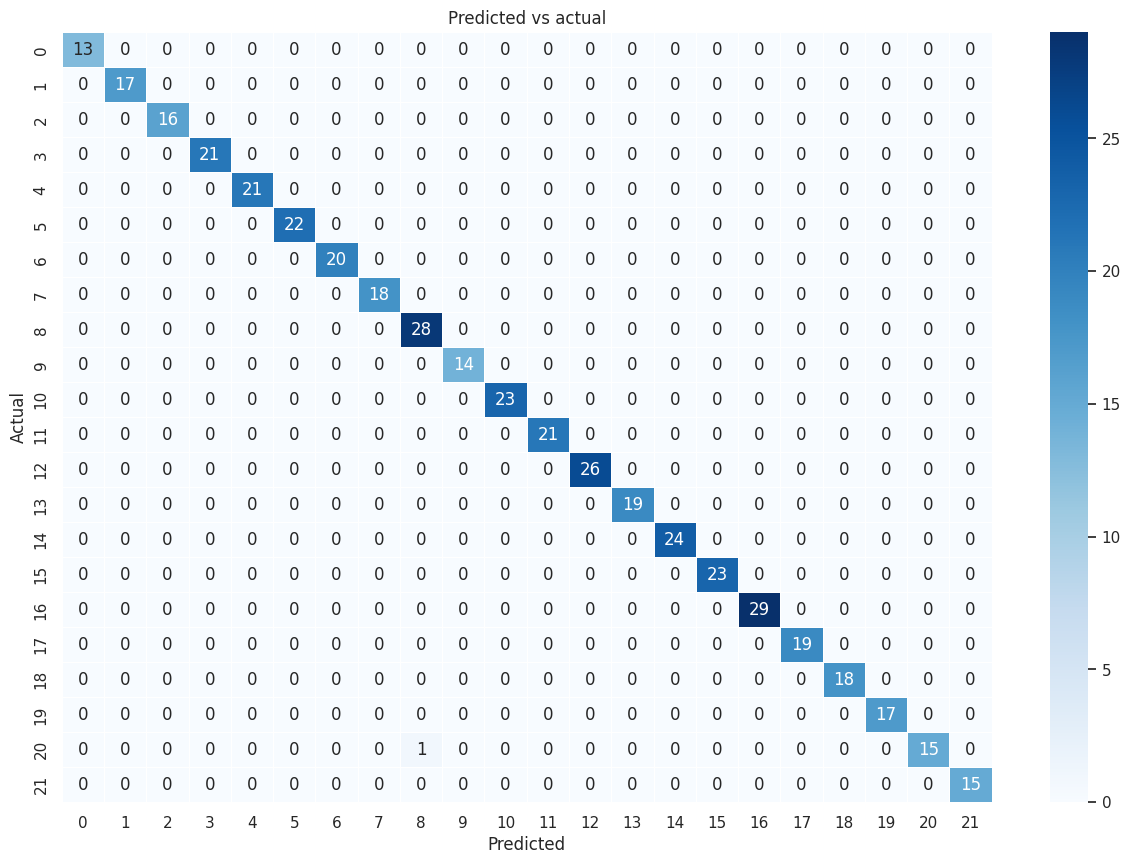

In [266]:
y_pred = random_forest.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt='g',  cmap='Blues', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [267]:
#Train Accuracy
rf_train_accuracy = random_forest.score(x_train,y_train)
print("Training accuracy = ",random_forest.score(x_train,y_train))
#Test Accuracy
rf_test_accuracy = random_forest.score(x_test,y_test)
print("Testing accuracy = ",random_forest.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9977272727272727


In [268]:
# Save model
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(random_forest, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [269]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Fit the XGBoost classifier
xgboost = xgb.XGBClassifier()
xgboost.fit(x_train,y_train_encoded)

# Make predictions
y_pred = xgboost.predict(x_test)

# Calculate accuracy and other metrics
x = metrics.accuracy_score(y_test_encoded, y_pred)
model_acc.append(x)
model_name.append('XGBoost')
print("XGBoost accuracy =", x)

XGBoost accuracy = 0.9931818181818182


In [270]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       1.00      0.93      0.96        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17       1.00    

In [271]:
# Encode the target variable
target_encoded = label_encoder.fit_transform(target)

# Perform cross-validation
score = cross_val_score(xgboost, features, target_encoded, cv=8)
print('Cross validation =', score)

Cross validation = [0.99636364 0.99636364 0.98909091 1.         0.99636364 0.99272727
 0.99272727 0.99272727]


In [272]:
# Train Accuracy
xgb_train_accuracy = xgboost.score(x_train, y_train_encoded)
print("Training accuracy =", xgb_train_accuracy)

# Test Accuracy
xgb_test_accuracy = xgboost.score(x_test, y_test_encoded)
print("Testing accuracy =", xgb_test_accuracy)

Training accuracy = 1.0
Testing accuracy = 0.9931818181818182


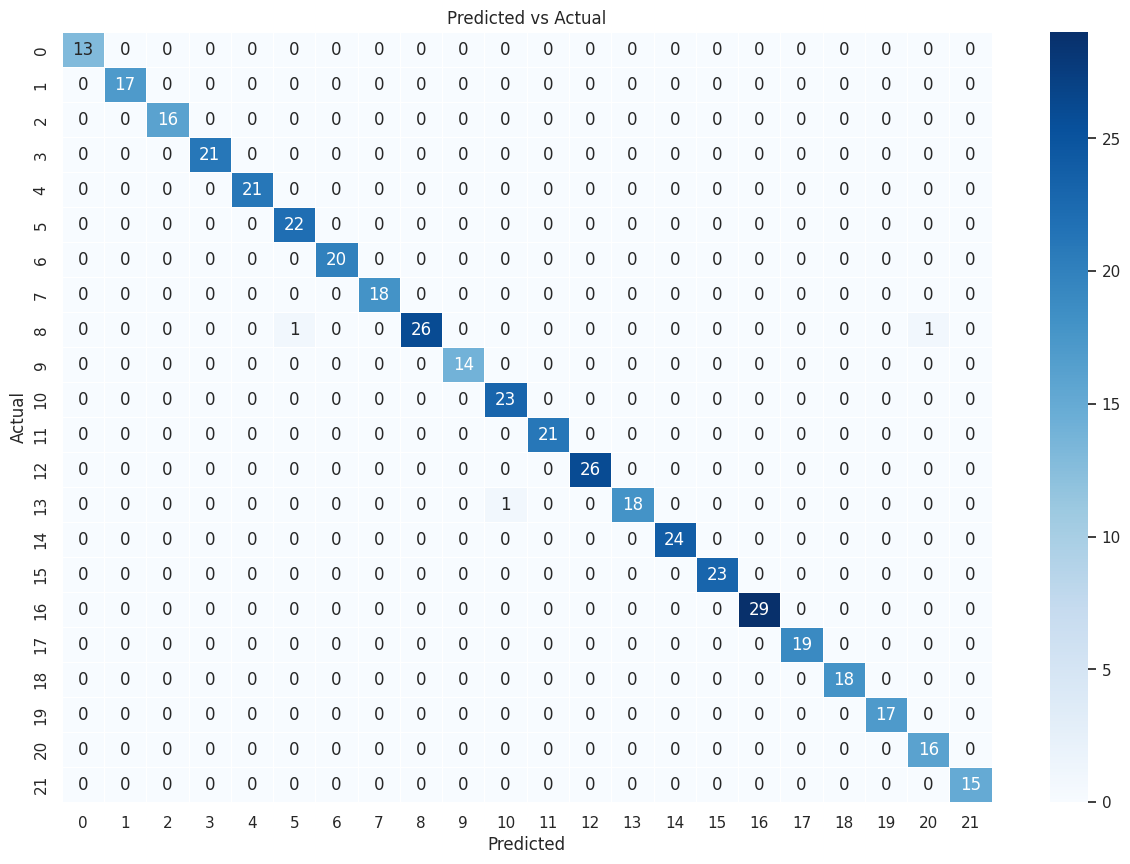

In [273]:
y_true_encoded = label_encoder.transform(y_true)

y_pred_encoded = xgboost.predict(x_test)

cm_rf = confusion_matrix(y_true_encoded, y_pred_encoded)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt='g', cmap='Blues', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs Actual')
plt.show()

In [283]:
# Save model
XGB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XGB_Model_pkl = open(XGB_pkl_filename, 'wb')
pickle.dump(xgboost, XGB_Model_pkl)
# Close the pickle instances
XGB_Model_pkl.close()

# Naive Bayes

In [275]:
# Create Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the Naive Bayes classifier
naive_bayes.fit(x_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(x_test)

# Calculate accuracy and other metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
model_acc.append(accuracy)
model_name.append('Naive Bayes')
print("Naive Bayes accuracy =", accuracy)


Naive Bayes accuracy = 0.990909090909091


In [276]:
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [277]:
# Cross validation
score = cross_val_score(naive_bayes,features,target,cv=8)
print('Cross validation = ',score)

Cross validation =  [1.         0.99636364 0.99636364 0.98545455 1.         0.99272727
 0.98909091 0.99636364]


In [278]:
#Train Accuracy
nb_train_accuracy = naive_bayes.score(x_train,y_train)
print("Training accuracy = ",naive_bayes.score(x_train,y_train))
#Test Accuracy
nb_test_accuracy = naive_bayes.score(x_test,y_test)
print("Testing accuracy = ",naive_bayes.score(x_test,y_test))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.990909090909091


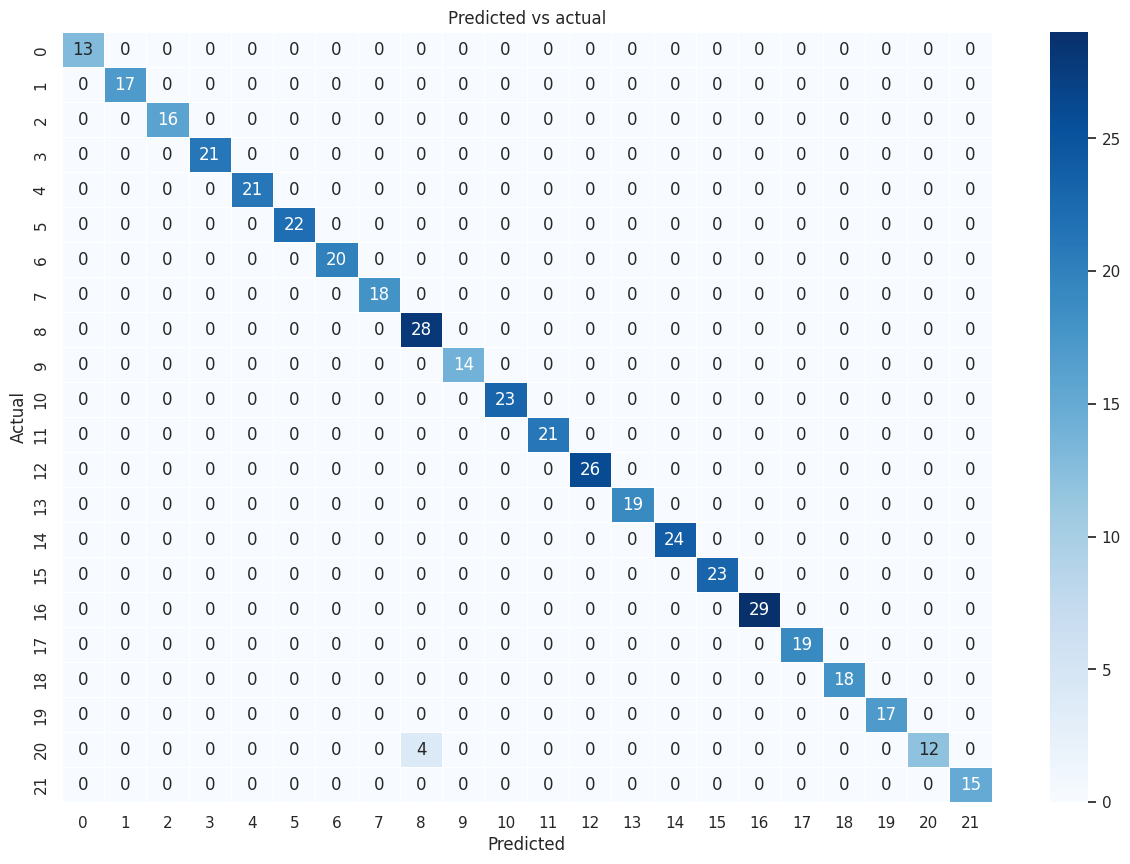

In [279]:
y_pred = naive_bayes.predict(x_test)
y_true = y_test

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt='g',  cmap='Blues', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [280]:
# Save model
NB_pkl_filename = 'NaiveBayes.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(naive_bayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Model Comparasion

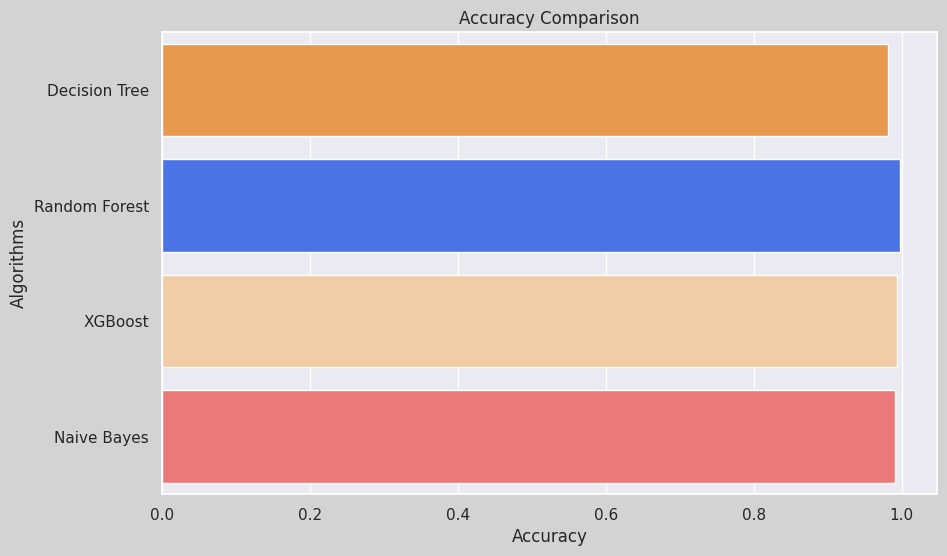

In [281]:
plt.figure(figsize=(10, 6), dpi=100, facecolor='lightgray')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')

colors = ['#ff9933', '#3366ff','#ffcc99', '#ff6666'] 

sns.barplot(x=model_acc, y=model_name, palette=colors)

plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()


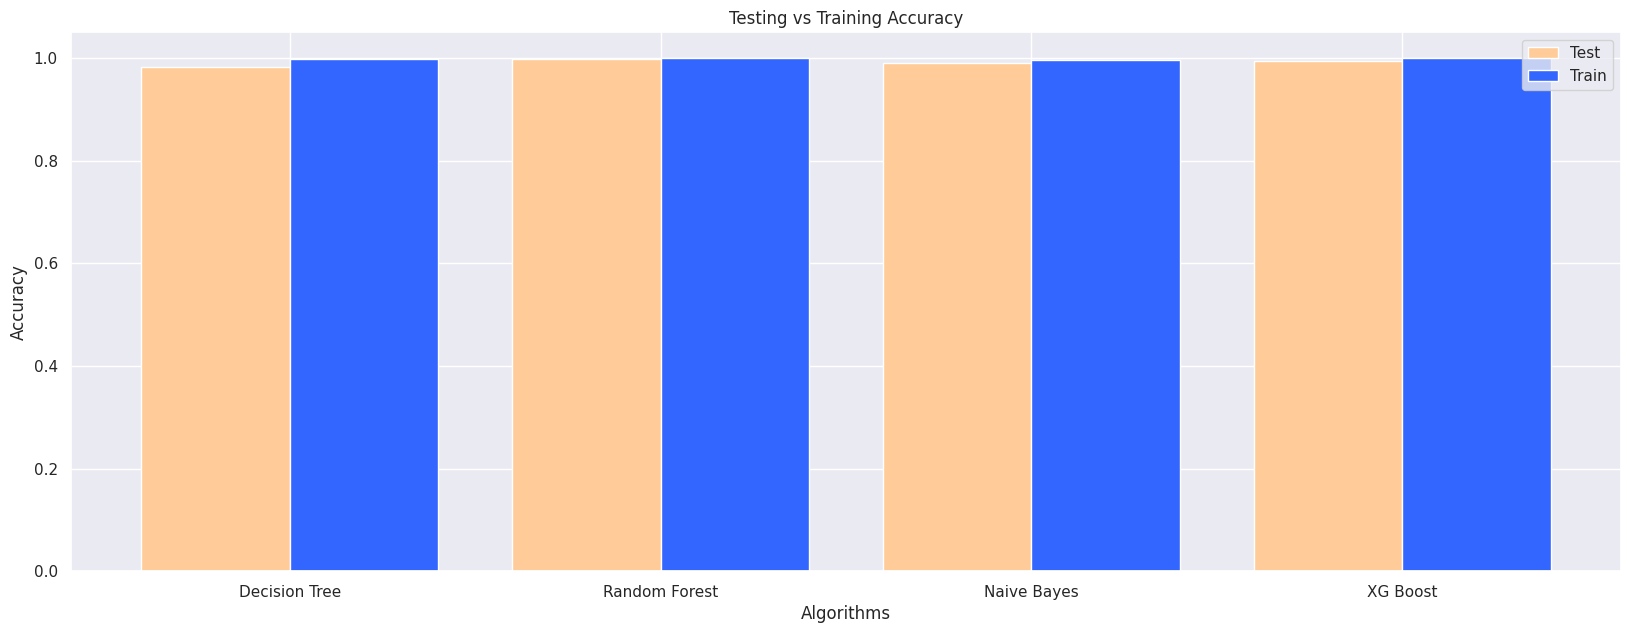

In [282]:
label = ['Decision Tree','Random Forest','Naive Bayes','XG Boost']
Test = [dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy, xgb_test_accuracy]
Train = [dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy, xgb_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('#ffcc99'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('#3366ff'))

plt.xticks(X_axis, label)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()